In [ ]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/spring20/setup_colab.sh -O- | bash

    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/grading.py -O ../grading.py
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/week1_intro/submit.py

    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

Selecting previously unselected package xvfb.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.7_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.7) ...
Setting up xvfb (2:1.19.6-1ubuntu4.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Starting virtual X frame buffer: Xvfb.


In [ ]:
!pip show pyglet

Name: pyglet
Version: 1.5.0
Summary: Cross-platform windowing and multimedia library
Home-page: http://pyglet.readthedocs.org/en/latest/
Author: Alex Holkner
Author-email: Alex.Holkner@gmail.com
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: future
Required-by: gym


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### OpenAI Gym

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI gym comes into play. It's a python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:

Observation space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space: Discrete(3)


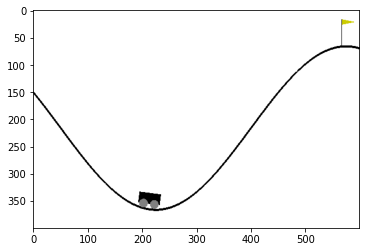

In [ ]:
import gym

env = gym.make("MountainCar-v0")
env.reset()

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Note: if you're running this on your local machine, you'll see a window pop up with the image above. Don't close it, just alt-tab away.

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it ~~for now~~.

In [ ]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.46389416  0.        ]


In [ ]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the right slightly (around 0.0005)

taking action 2 (right)
new observation code: [-0.46333956  0.00055461]
reward: -1.0
is game over?: False


### Play with it

Below is the code that drives the car to the right. However, if you simply use the default policy, the car will not reach the flag at the far right due to gravity.

__Your task__ is to fix it. Find a strategy that reaches the flag. 

You are not required to build any sophisticated algorithms for now, feel free to hard-code :)

In [ ]:
from IPython import display

# Create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.envs.classic_control.MountainCarEnv(),
    max_episode_steps=TIME_LIMIT + 1,
)
actions = {'left': 0, 'stop': 1, 'right': 2}

In [ ]:
def policy(obs, t):
    # Write the code for your policy here. You can use the observation
    # (a tuple of position and velocity), the current time step, or both,
    # if you want.
    position, velocity = obs
    if(t > 70 and t < 120 ):
      return actions['left']
    else:

    # This is an example policy. You can try running it, but it will not work.
    # Your goal is to fix that.
      return actions['right']

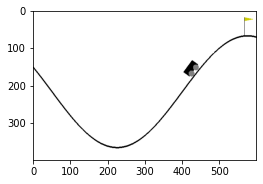

In [ ]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs = env.reset()
for t in range(TIME_LIMIT):
    plt.gca().clear()
    
    action = policy(obs, t)  # Call your policy
    print(action)
    obs, reward, done, _ = env.step(action)  # Pass the action chosen by the policy to the environment
    
    # We don't do anything with reward here because MountainCar is a very simple environment,
    # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

    # Draw game image on display.
    plt.imshow(env.render('rgb_array'))
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)

In [ ]:
action

2

In [ ]:
!pip freeze

absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.3.0
astor==0.8.1
astropy==4.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.2.0
audioread==2.1.9
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.2.1
blis==0.4.1
bokeh==2.1.1
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.3
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.4
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
Django==3.1.3
dlib==19.18.0
dm-tree==0.1.5
docopt==0.6.2
docutil

In [ ]:
from submit import submit_interface
submit_interface(policy, 'your.email@example.com', 'YourAssignmentToken')

Your car ended in state {x=-0.1089476143423666, v=-0.016929742081382912}.
The flag is located roughly at x=0.46. You did not reach it.
Submission to Coursera returned with HTTP status code 401.
You can try generating a new token and make sure you spelled it correctly.
Here is the full response:
{'details': None,
 'errorCode': 'invalidEmailOrToken',
 'message': 'Invalid email or token.'}
